# Models Pipeline

We want to see how different models affect our dataset.

In [20]:
from preprocessing import load_dataset, split_dataset, grid_search, interactions
from utilities import plot_grid_results, print_log
import models

We define the generic parameters, to be used to split the dataset.

In [21]:
test_size = 0.2         # the ratio of the dataset we want to use as test set
stratify = True         # Whether we want the split to keep the same proportion between classes as the original dataset
k = 5                   # The number of folds for the (stratified) k fold 

First of all, we load the dataset and we split it into training and test set (to be used only in the end).

In [22]:
# first, we load the dataset
X, y = load_dataset('./data/data.pkl')
# then, we split it
X_tr, y_tr, X_te, y_te = split_dataset(X, y, test=test_size, stratify=stratify)

# generate the dataset version with interaction, with/without drop
X_tr_drop = interactions(X_tr, drop=True)
X_tr_int = interactions(X_tr, drop=False)

# TEST use polynomial features instad of interactions
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3, interaction_only=True)

X_tr = poly.fit_transform(X_tr)



Now, we can start to try the grid search with different models, to see how it behaves.

Notice we want to have high __*recall*__ for class 'MATCH' (that is, we want to detect as many MATCH samples as possible). For this reason, we put recall as main metric for our grid search.

## K-Nearest Neighbors

We run a grid search on the kNN model, trying values of k from 1 to 10. Since our data is highly dimensional, we expect such an algorithm to perform bad.

### 1. No interactions, no PCA

In [23]:
# get pipeline 
pipe, grid = models.scaling(models.knn)
# call grid_search
out_knn = grid_search(X_tr, y_tr, pipe, grid, k)

print_log(out_knn)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\caven\Repos\malis-speed-dating\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\caven\AppData\Local\Temp\ipykernel_2224\3805309326.py", line 4, in <module>
    out_knn = grid_search(X_tr, y_tr, pipe, grid, k)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\caven\Repos\malis-speed-dating\preprocessing.py", line 118, in grid_search
  File "c:\Users\caven\Repos\malis-speed-dating\venv\Lib\site-packages\sklearn\model_selection\_search.py", line 875, in fit
    self._run_search(evaluate_candidates)
  File "c:\Users\caven\Repos\malis-speed-dating\venv\Lib\site-packages\sklearn\model_selection\_search.py", line 1389, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "c:\Users\caven\Repos\malis-speed-dating\venv\Lib\site-packages\sklearn\model_selection\_search.py", line 822, in evaluate_cand

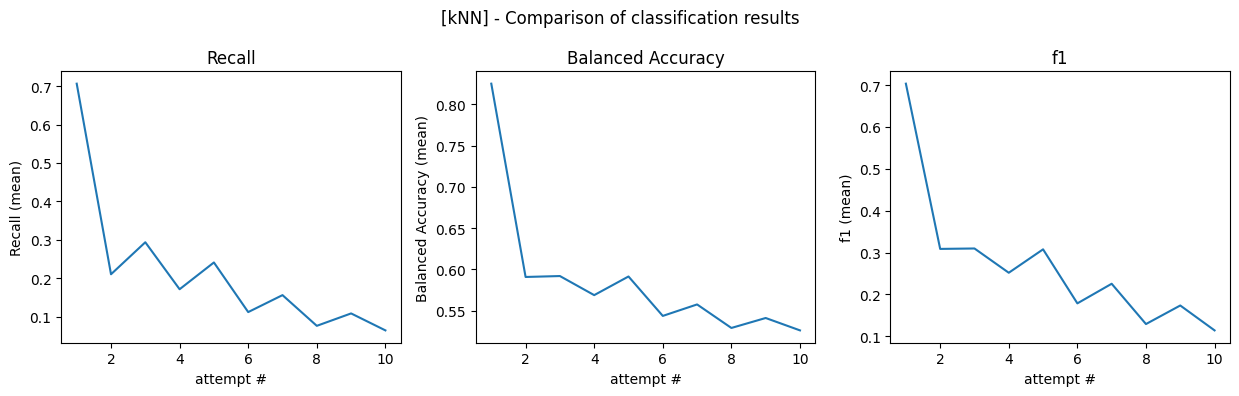

In [15]:
# Plot recall, balanced accuracy and f1 metric for every k in the range
plot_grid_results(out_knn, 'kNN')

### 2. Interactions, drop, PCA

In [16]:
# get pipeline 
pipe, grid = models.over_sampling(models.pca, n_components=[25, 58], model_f = models.knn)
# call grid_search
out_knn = grid_search(X_tr_drop, y_tr, pipe, grid, k)

print_log(out_knn)

Best model (according to recall): {'model__n_neighbors': 1, 'pca__n_components': 58}
-----------------------------------------
Recall : 0.7012603215993047
Balanced accuracy: 0.8266113224950997
f1: 0.714357547941682


As expected, we get a really low performance. ...FIXME

## Logistic Regression

Normal Logistic Regression does not converge. We try some strategies to reduce the dimensionality of our data.

### 1. LR - with interation, drop, scaling



In [17]:
# get pipeline 
pipe, grid = models.scaling(models.logistic_regression)
# call grid_search
out_lr_drop = grid_search(X_tr_drop, y_tr, pipe, grid, k)

print_log(out_lr_drop)

Best model (according to recall): {'model__C': 10}
-----------------------------------------
Recall : 0.02207735767057801
Balanced accuracy: 0.5069570461822278
f1: 0.04126721132059997


### 2. LR - with interation, drop, PCA

In [18]:
# get pipeline 
pipe, grid = models.over_sampling(models.pca, n_components=[20, 30, 58], model_f=models.logistic_regression)
# call grid_search
out_lr_pca = grid_search(X_tr_drop, y_tr, pipe, grid, k)

print_log(out_lr_pca)

c:\Users\caven\Repos\malis-speed-dating\venv\Lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\caven\Repos\malis-speed-dating\venv\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\caven\Repos\malis-speed-dating\venv\Lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\caven\Repos\malis-speed-dating\venv\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\caven\Repos\malis-speed-dating\venv\Lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not conver

Best model (according to recall): {'model__C': 10000, 'pca__n_components': 20}
-----------------------------------------
Recall : 0.10527306967984935
Balanced accuracy: 0.5089944626264239
f1: 0.13297617792774113


## Random Forest

In [19]:
# get pipeline 
pipe, grid = models.over_sampling(models.scaling, model_f = models.random_forest)
# call grid_search
out_rf = grid_search(X_tr_int, y_tr, pipe, grid, k)

print_log(out_rf)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\caven\Repos\malis-speed-dating\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\caven\AppData\Local\Temp\ipykernel_2224\1451709855.py", line 4, in <module>
    out_rf = grid_search(X_tr_int, y_tr, pipe, grid, k)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\caven\Repos\malis-speed-dating\preprocessing.py", line 118, in grid_search
  File "c:\Users\caven\Repos\malis-speed-dating\venv\Lib\site-packages\sklearn\model_selection\_search.py", line 875, in fit
    self._run_search(evaluate_candidates)
  File "c:\Users\caven\Repos\malis-speed-dating\venv\Lib\site-packages\sklearn\model_selection\_search.py", line 1389, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "c:\Users\caven\Repos\malis-speed-dating\venv\Lib\site-packages\sklearn\model_selection\_search.py", line 822, in evaluat

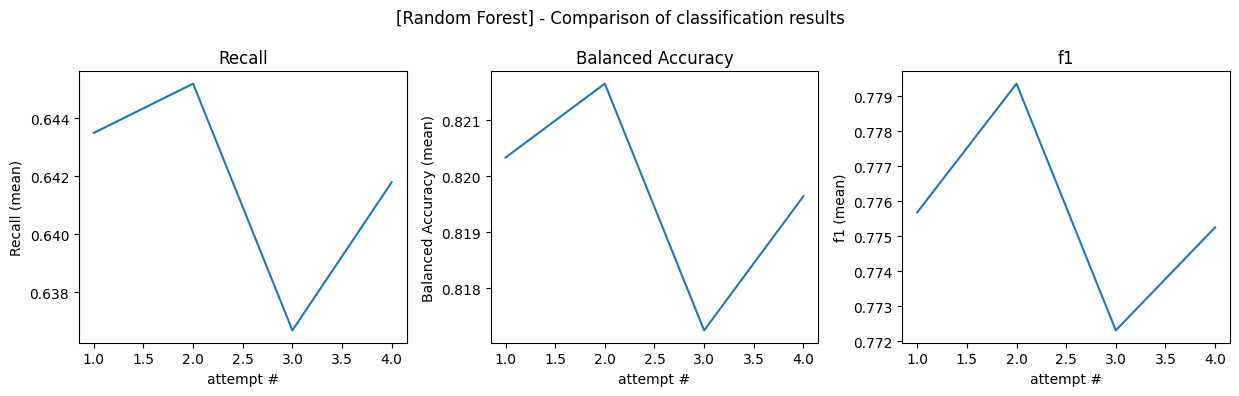

In [ ]:
plot_grid_results(out_rf, 'Random Forest')